In [5]:
import matplotlib.pyplot as plt

# value_size를 숫자(KB 단위)로 변환
def parse_size(size_str):
    return int(size_str.replace('KB', ''))

def plot_graph(df1, df2, col, workload, compare="universal", metric="WAF"):
    df1 = df1.copy()
    df2 = df2.copy()
    
    df1["value_size_numeric"] = df1["value_size"].apply(parse_size)
    df2["value_size_numeric"] = df2["value_size"].apply(parse_size)

    # 색상 리스트
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    plt.figure(figsize=(8, 6))

    # 꺾은선 그래프 (df1)
    if col:
        unique_levels = sorted(df1[col].dropna().unique())
        for i, level_base in enumerate(unique_levels):
            subset = df1[df1[col] == level_base].sort_values(by="value_size_numeric")
            if not subset.empty:
                plt.plot(subset["value_size_numeric"], subset[metric], marker='o', label=f"{level_base} (line)", color=colors[i % len(colors)])
    else:
        df1_sorted = df1.sort_values(by="value_size_numeric")
        plt.plot(df1_sorted["value_size_numeric"], df1_sorted[metric], marker='o', color='tab:blue', label='df1 (line)')

    # 막대 그래프 (df2)
    df2_sorted = df2.sort_values(by="value_size_numeric")
    plt.bar(df2_sorted["value_size_numeric"], df2_sorted[metric], width=1.5, alpha=0.5, color='gray', label=compare)

    # 공통 설정
    title = f"{metric.upper()} from value_size in {workload}" if not col else f"{metric.upper()} from value_size for different {col} in {workload}"
    plt.title(title)
    plt.xlabel("Value Size (KB)")
    plt.ylabel(f"{metric}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Leveld log_data

In [6]:
import pandas as pd
# CSV 파일 읽기
leveled = pd.read_csv('modified_h1_leveled_output.csv')
leveled

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,leveled,1KB,1000000,1056000000,578234114,554187213,1056000000,1000000,2.072369,17.633,56713.0,56.2
1,fillrandom,leveled,16KB,1000000,16417000000,28807556920,8996802021,16417000000,1000000,3.302757,568.117,1760.0,27.5
2,overwrite,leveled,4KB,1000000,4128000000,4132415467,2264135644,4128000000,1000000,2.549552,106.751,9367.0,36.7
3,overwrite,leveled,16KB,1000000,16417000000,30046059239,8997781401,16417000000,1000000,3.378257,559.067,1788.0,28.0
4,fillrandom,leveled,4KB,1000000,4128000000,4046238194,2264579990,4128000000,1000000,2.528783,105.161,9509.0,37.3
5,fillrandom,leveled,1KB,1000000,1056000000,573607285,554209671,1056000000,1000000,2.068008,18.891,52933.0,52.5


In [7]:
leveled_overwrite = leveled[leveled['workload'] == 'overwrite']
leveled_overwrite

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,leveled,1KB,1000000,1056000000,578234114,554187213,1056000000,1000000,2.072369,17.633,56713.0,56.2
2,overwrite,leveled,4KB,1000000,4128000000,4132415467,2264135644,4128000000,1000000,2.549552,106.751,9367.0,36.7
3,overwrite,leveled,16KB,1000000,16417000000,30046059239,8997781401,16417000000,1000000,3.378257,559.067,1788.0,28.0


In [8]:
leveled_fillrandom = leveled[leveled['workload'] == 'fillrandom']
leveled_fillrandom

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
1,fillrandom,leveled,16KB,1000000,16417000000,28807556920,8996802021,16417000000,1000000,3.302757,568.117,1760.0,27.5
4,fillrandom,leveled,4KB,1000000,4128000000,4046238194,2264579990,4128000000,1000000,2.528783,105.161,9509.0,37.3
5,fillrandom,leveled,1KB,1000000,1056000000,573607285,554209671,1056000000,1000000,2.068008,18.891,52933.0,52.5


## Universal_log_data

In [9]:
import pandas as pd
# CSV 파일 읽기
universal = pd.read_csv('modified_h1_universal_output.csv')
universal

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,universal,1KB,1000000,1056000000,589472628,554212973,1056000000,1000000,2.083036,13.732,72819.0,72.2
1,fillrandom,universal,4KB,1000000,4128000000,3540818396,2301488797,4128000000,1000000,2.415288,74.644,13396.0,52.5
2,overwrite,universal,16KB,1000000,16417000000,20922566009,8996726917,16417000000,1000000,2.822458,315.428,3170.0,49.6
3,fillrandom,universal,16KB,1000000,16417000000,23330374011,8996719499,16417000000,1000000,2.969123,344.567,2902.0,45.4
4,fillrandom,universal,1KB,1000000,1056000000,590356007,554189559,1056000000,1000000,2.083850,13.143,76087.0,75.5
5,overwrite,universal,4KB,1000000,4128000000,3254281401,2263874391,4128000000,1000000,2.336763,61.157,16351.0,64.1


In [10]:
universal_overwrite = universal[universal['workload'] == 'overwrite']
universal_overwrite

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,universal,1KB,1000000,1056000000,589472628,554212973,1056000000,1000000,2.083036,13.732,72819.0,72.2
2,overwrite,universal,16KB,1000000,16417000000,20922566009,8996726917,16417000000,1000000,2.822458,315.428,3170.0,49.6
5,overwrite,universal,4KB,1000000,4128000000,3254281401,2263874391,4128000000,1000000,2.336763,61.157,16351.0,64.1


In [11]:
universal_fillrandom = universal[universal['workload'] == 'fillrandom']
universal_fillrandom

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
1,fillrandom,universal,4KB,1000000,4128000000,3540818396,2301488797,4128000000,1000000,2.415288,74.644,13396.0,52.5
3,fillrandom,universal,16KB,1000000,16417000000,23330374011,8996719499,16417000000,1000000,2.969123,344.567,2902.0,45.4
4,fillrandom,universal,1KB,1000000,1056000000,590356007,554189559,1056000000,1000000,2.083850,13.143,76087.0,75.5


### Compare with Leveled

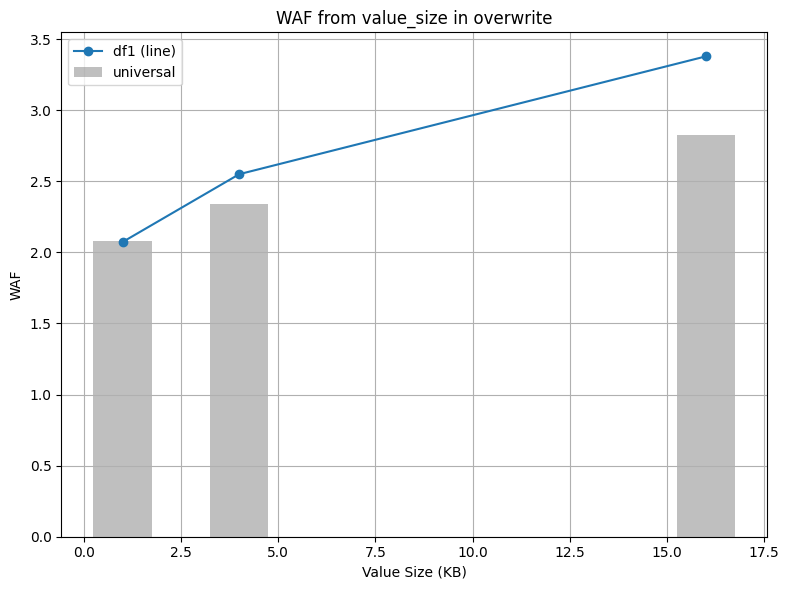

In [12]:
plot_graph(leveled_overwrite, universal_overwrite, col=None, workload='overwrite', compare="universal")

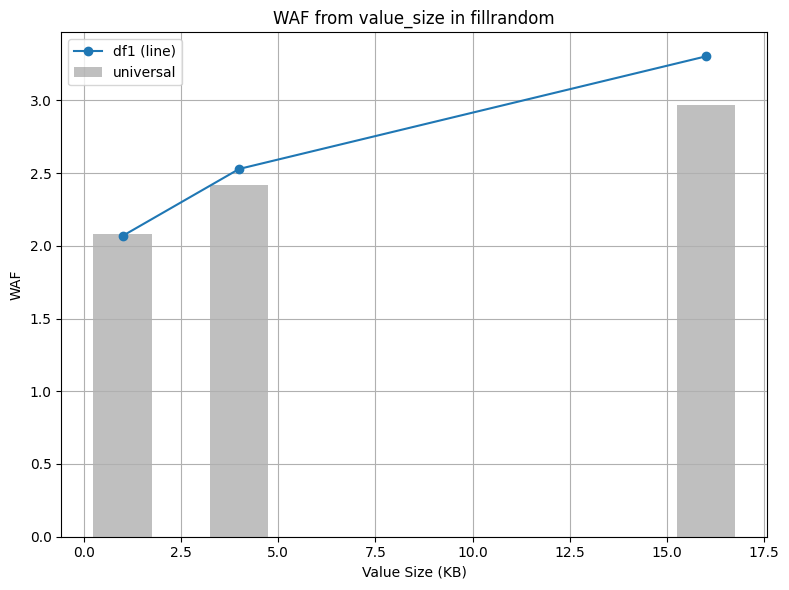

In [13]:
plot_graph(leveled_fillrandom, universal_fillrandom, col=None, workload='fillrandom', compare="universal")

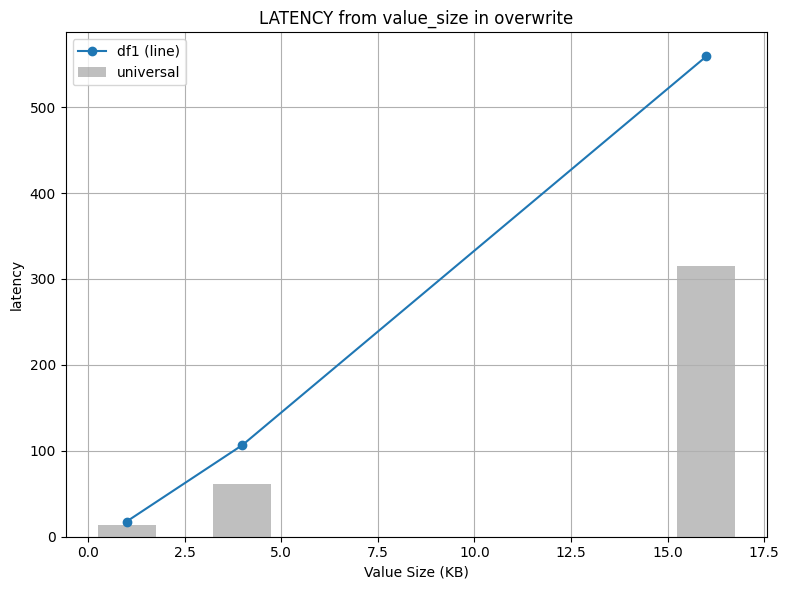

In [14]:
plot_graph(leveled_overwrite, universal_overwrite, col=None, workload='overwrite', compare="universal", metric="latency")

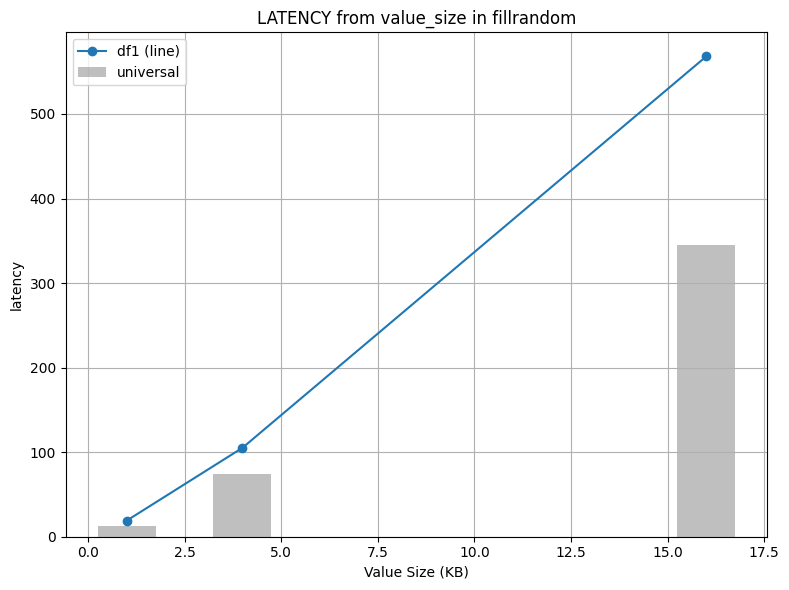

In [15]:
plot_graph(leveled_fillrandom, universal_fillrandom, col=None, workload='fillrandom', compare="universal", metric="latency")

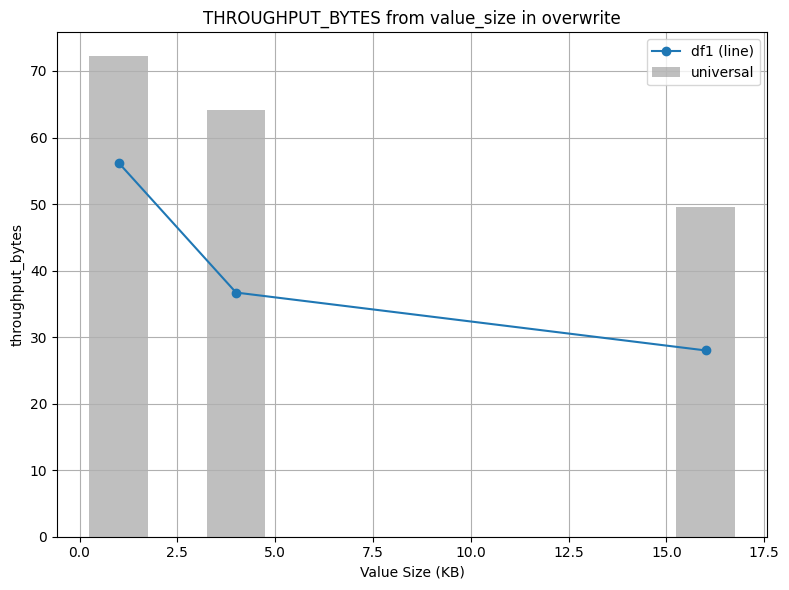

In [16]:
plot_graph(leveled_overwrite, universal_overwrite, col=None, workload='overwrite', compare="universal", metric="throughput_bytes")

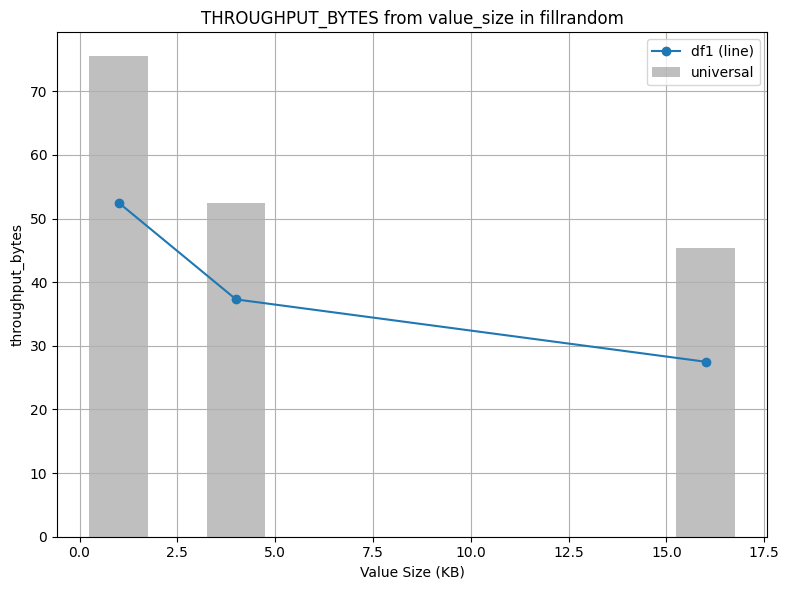

In [17]:
plot_graph(leveled_fillrandom, universal_fillrandom, col=None, workload='fillrandom', compare="universal", metric="throughput_bytes")

## Level_base_log_data

In [18]:
import pandas as pd
# CSV 파일 읽기
base = pd.read_csv('modified_h1_base_output.csv')
base

,workload,compaction_style,value_size,max_bytes_for_level_base,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,leveled,4KB,64MB,1000000,4128000000,3624640394,2264460227,4128000000,1000000,2.426623,56.711,17633.0,69.1
1,overwrite,leveled,4KB,256MB,1000000,4128000000,3926898292,2301346485,4128000000,1000000,2.508780,65.895,15175.0,59.5
2,fillrandom,leveled,16KB,512MB,1000000,16417000000,36052092660,8996302229,16417000000,1000000,3.744009,437.744,2284.0,35.7
3,overwrite,leveled,4KB,512MB,1000000,4128000000,4394162603,2301497226,4128000000,1000000,2.622011,68.297,14641.0,57.4
4,overwrite,leveled,1KB,512MB,1000000,1056000000,578140401,554188512,1056000000,1000000,2.072281,17.691,56527.0,56.1
5,fillrandom,leveled,4KB,256MB,1000000,4128000000,4003270522,2301632341,4128000000,1000000,2.527350,57.195,17484.0,68.6
6,fillrandom,leveled,1KB,64MB,1000000,1056000000,657101850,554147546,1056000000,1000000,2.147016,16.308,61319.0,60.8
7,fillrandom,leveled,1KB,512MB,1000000,1056000000,588671433,554175641,1056000000,1000000,2.082242,16.580,60312.0,59.8
8,fillrandom,leveled,1KB,256MB,1000000,1056000000,612860902,554235912,1056000000,1000000,2.105205,15.947,62707.0,62.2
9,fillrandom,leveled,16KB,64MB,1000000,16417000000,27054478941,8996874388,16417000000,1000000,3.195977,373.762,2675.0,41.8


In [19]:
base_overwrite = base[base['workload'] == 'overwrite']

In [20]:
base_overwrite.sort_values(by=['max_bytes_for_level_base', 'value_size'])

,workload,compaction_style,value_size,max_bytes_for_level_base,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
17,overwrite,leveled,16KB,256MB,1000000,16417000000,28906731543,8996900767,16417000000,1000000,3.308804,392.455,2548.0,39.9
15,overwrite,leveled,1KB,256MB,1000000,1056000000,586670980,554101456,1056000000,1000000,2.080277,17.173,58230.0,57.8
1,overwrite,leveled,4KB,256MB,1000000,4128000000,3926898292,2301346485,4128000000,1000000,2.508780,65.895,15175.0,59.5
11,overwrite,leveled,16KB,512MB,1000000,16417000000,35711830951,8997355246,16417000000,1000000,3.723347,471.106,2122.0,33.2
4,overwrite,leveled,1KB,512MB,1000000,1056000000,578140401,554188512,1056000000,1000000,2.072281,17.691,56527.0,56.1
3,overwrite,leveled,4KB,512MB,1000000,4128000000,4394162603,2301497226,4128000000,1000000,2.622011,68.297,14641.0,57.4
14,overwrite,leveled,16KB,64MB,1000000,16417000000,28758806652,9033100267,16417000000,1000000,3.301998,409.450,2442.0,38.2
12,overwrite,leveled,1KB,64MB,1000000,1056000000,616212692,554147906,1056000000,1000000,2.108296,17.641,56684.0,56.2
0,overwrite,leveled,4KB,64MB,1000000,4128000000,3624640394,2264460227,4128000000,1000000,2.426623,56.711,17633.0,69.1


In [21]:
base_fillrandom = base[base['workload'] == 'fillrandom']
base_fillrandom

,workload,compaction_style,value_size,max_bytes_for_level_base,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
2,fillrandom,leveled,16KB,512MB,1000000,16417000000,36052092660,8996302229,16417000000,1000000,3.744009,437.744,2284.0,35.7
5,fillrandom,leveled,4KB,256MB,1000000,4128000000,4003270522,2301632341,4128000000,1000000,2.527350,57.195,17484.0,68.6
6,fillrandom,leveled,1KB,64MB,1000000,1056000000,657101850,554147546,1056000000,1000000,2.147016,16.308,61319.0,60.8
7,fillrandom,leveled,1KB,512MB,1000000,1056000000,588671433,554175641,1056000000,1000000,2.082242,16.580,60312.0,59.8
8,fillrandom,leveled,1KB,256MB,1000000,1056000000,612860902,554235912,1056000000,1000000,2.105205,15.947,62707.0,62.2
9,fillrandom,leveled,16KB,64MB,1000000,16417000000,27054478941,8996874388,16417000000,1000000,3.195977,373.762,2675.0,41.8
10,fillrandom,leveled,4KB,512MB,1000000,4128000000,4390431402,2301548443,4128000000,1000000,2.621119,58.202,17181.0,67.4
13,fillrandom,leveled,16KB,256MB,1000000,16417000000,29512061896,8997147451,16417000000,1000000,3.345691,468.074,2136.0,33.4
16,fillrandom,leveled,4KB,64MB,1000000,4128000000,3625923549,2264390085,4128000000,1000000,2.426917,75.279,13283.0,52.1


### leveled

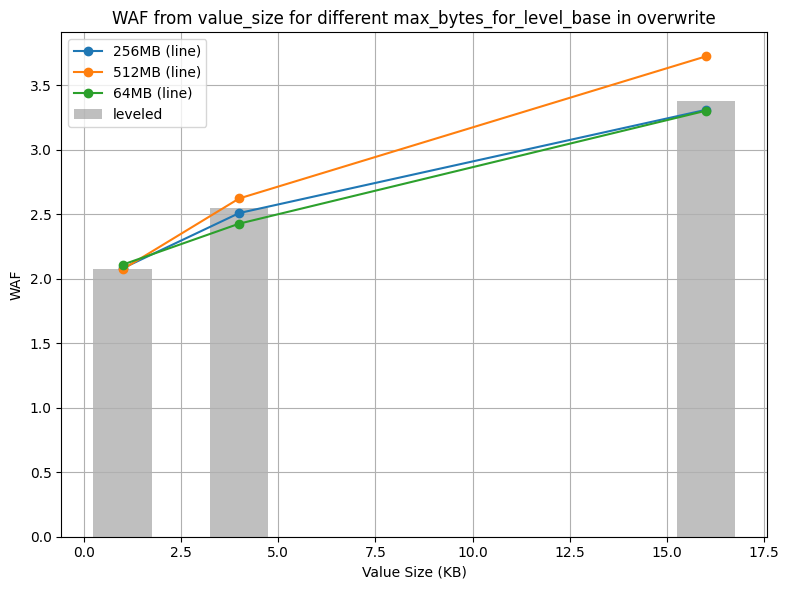

In [22]:
plot_graph(base_overwrite, leveled_overwrite, col="max_bytes_for_level_base", compare="leveled", workload="overwrite")

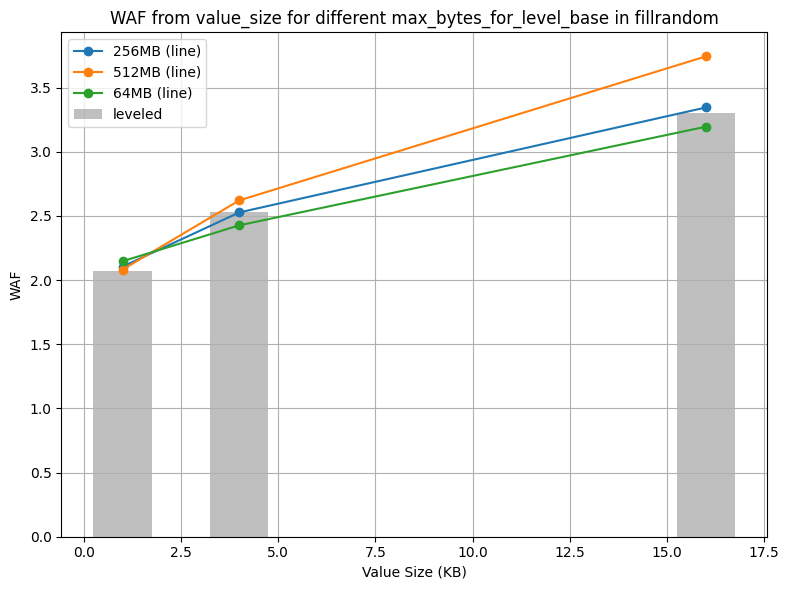

In [23]:
plot_graph(base_fillrandom, leveled_fillrandom, col="max_bytes_for_level_base", compare="leveled", workload="fillrandom")

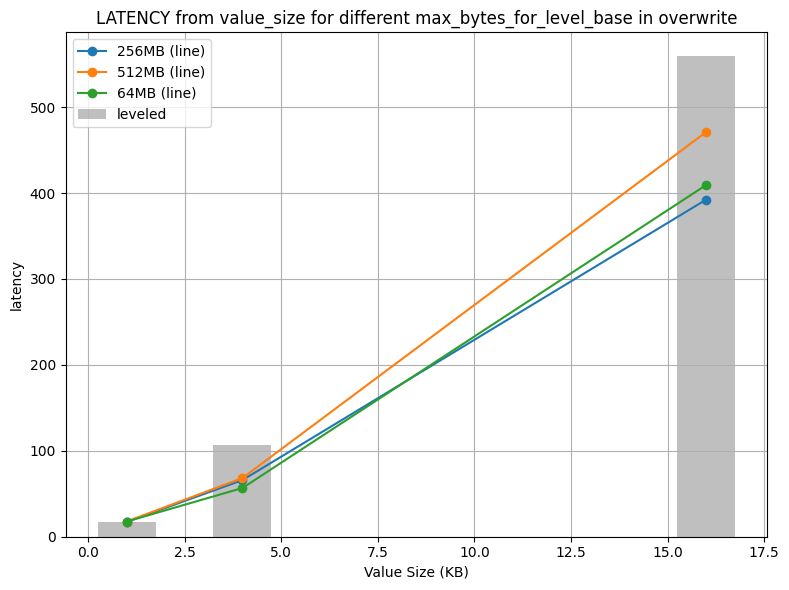

In [24]:
plot_graph(base_overwrite, leveled_overwrite, col="max_bytes_for_level_base", compare="leveled", workload="overwrite", metric="latency")

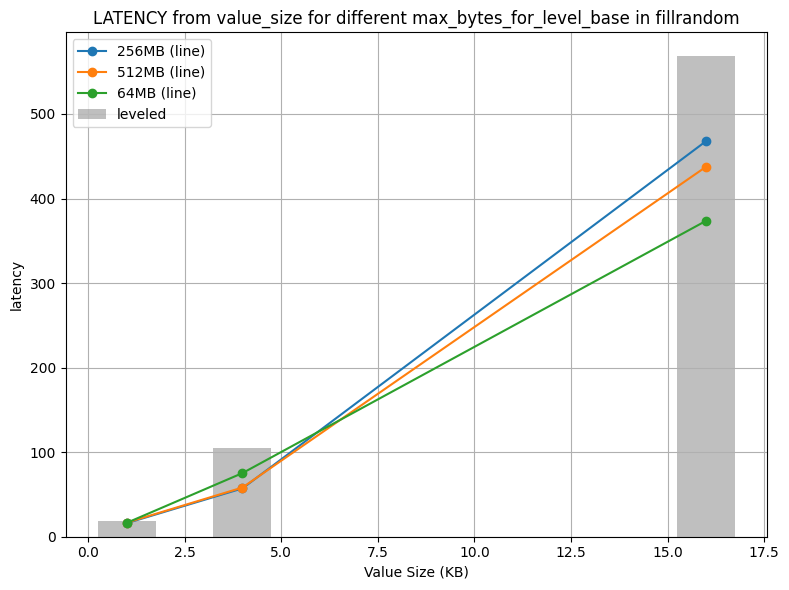

In [25]:
plot_graph(base_fillrandom, leveled_fillrandom, col="max_bytes_for_level_base", compare="leveled", workload="fillrandom", metric="latency")

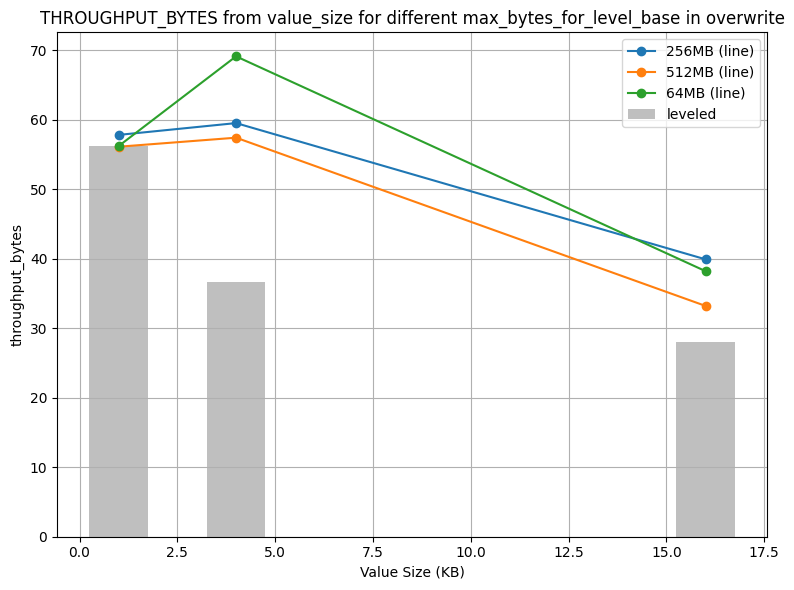

In [26]:
plot_graph(base_overwrite, leveled_overwrite, col="max_bytes_for_level_base", compare="leveled", workload="overwrite", metric="throughput_bytes")

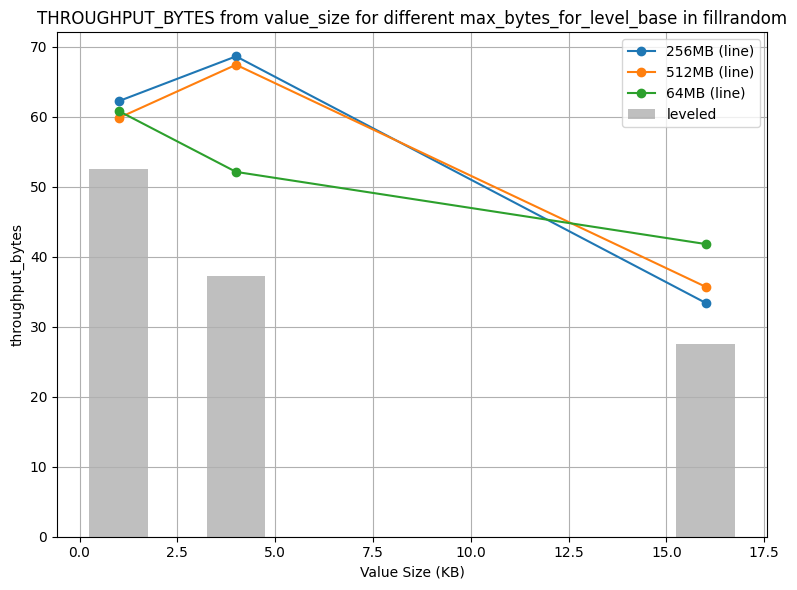

In [27]:
plot_graph(base_fillrandom, leveled_fillrandom, col="max_bytes_for_level_base", compare="leveled", workload="fillrandom", metric="throughput_bytes")

### universal

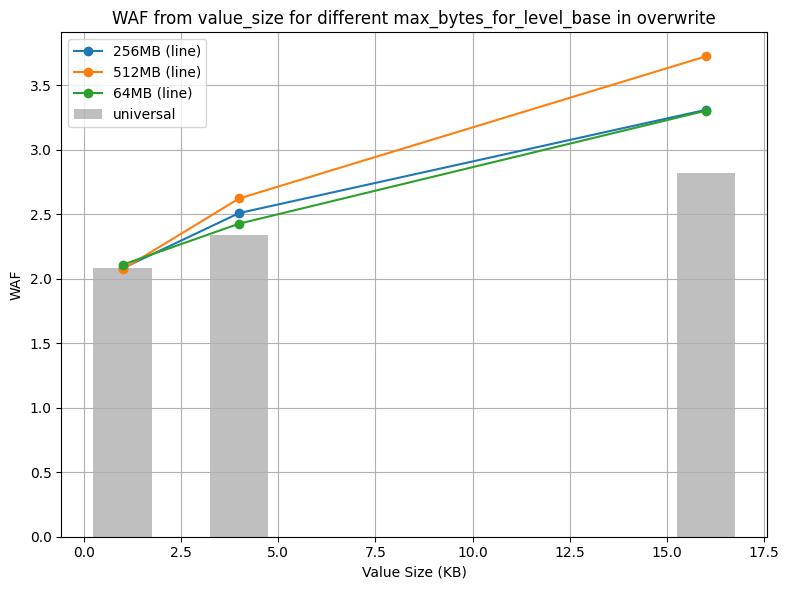

In [28]:
plot_graph(base_overwrite, universal_overwrite, col="max_bytes_for_level_base", workload="overwrite")

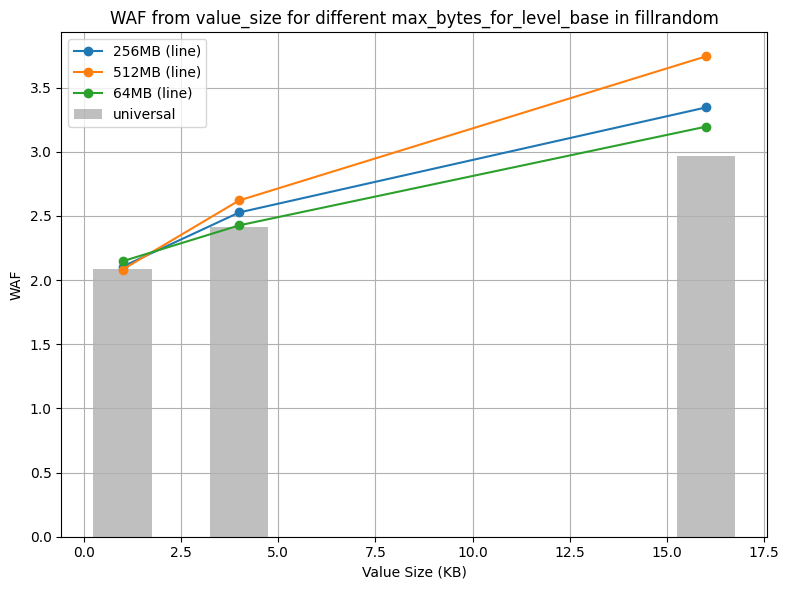

In [29]:
plot_graph(base_fillrandom, universal_fillrandom, col="max_bytes_for_level_base", workload="fillrandom")

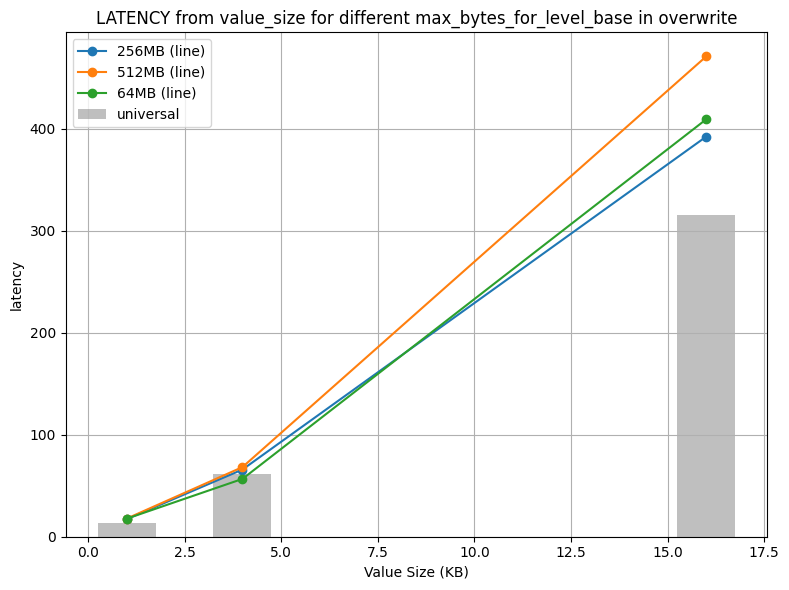

In [30]:
plot_graph(base_overwrite, universal_overwrite, col="max_bytes_for_level_base", workload="overwrite", metric="latency")

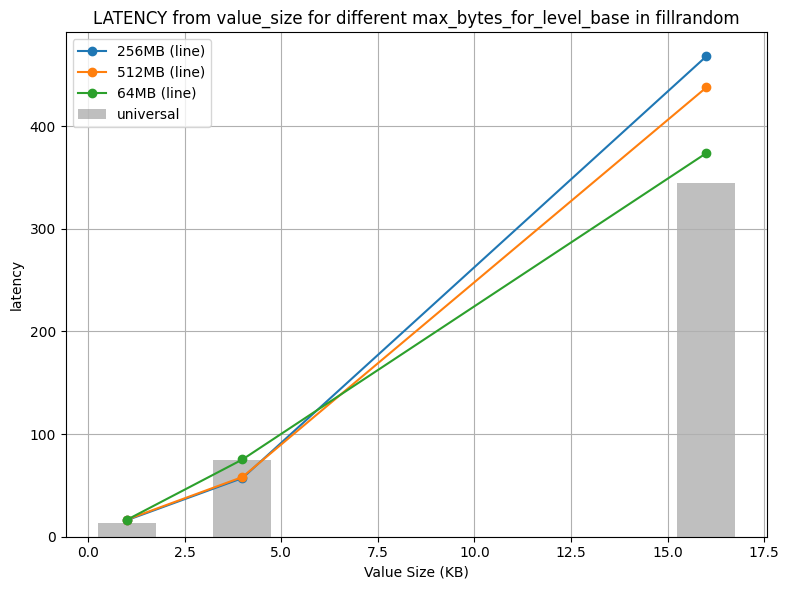

In [31]:
plot_graph(base_fillrandom, universal_fillrandom, col="max_bytes_for_level_base", workload="fillrandom", metric="latency")

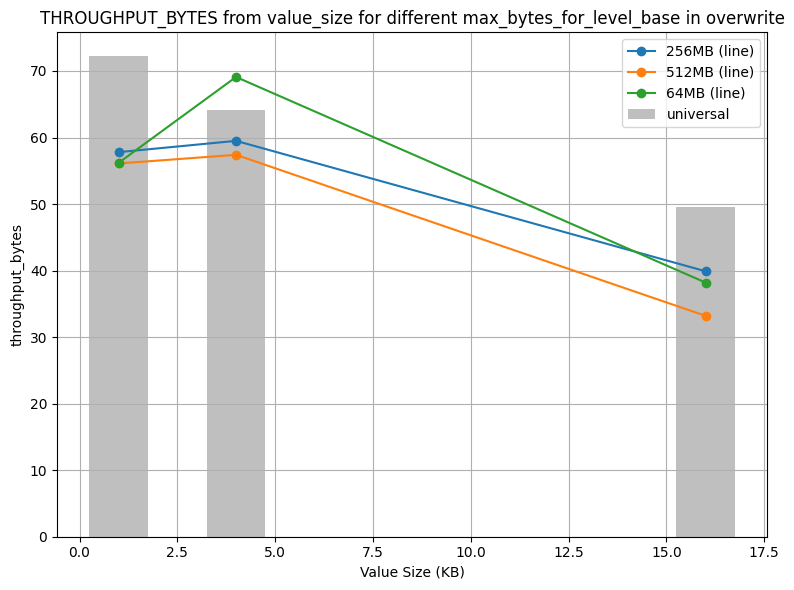

In [32]:
plot_graph(base_overwrite, universal_overwrite, col="max_bytes_for_level_base", workload="overwrite", metric="throughput_bytes")

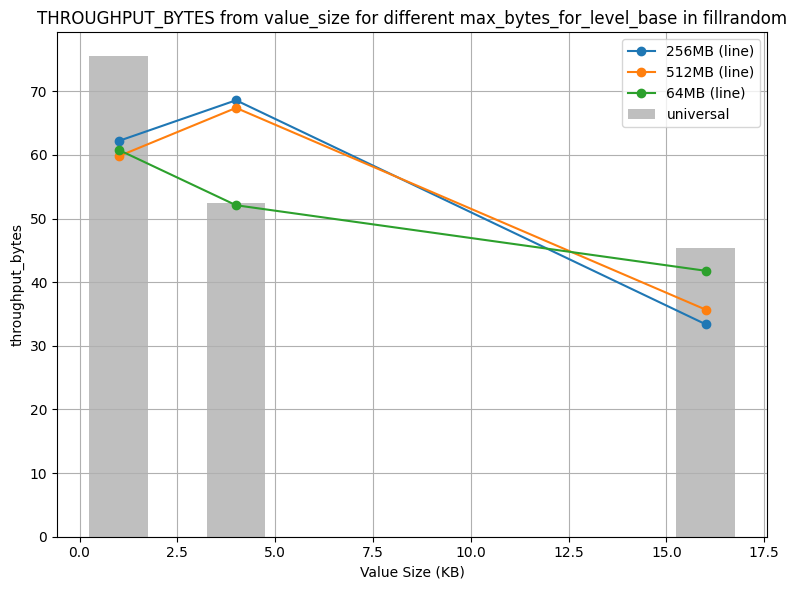

In [33]:
plot_graph(base_fillrandom, universal_fillrandom, col="max_bytes_for_level_base", workload="fillrandom", metric="throughput_bytes")

## Level_multiplier_log_data

In [34]:
import pandas as pd
# CSV 파일 읽기
multiplier = pd.read_csv('modified_h1_multiplier_output.csv')
multiplier

,workload,compaction_style,value_size,max_bytes_for_level_multiplier,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,leveled,4KB,20,1000000,4128000000,3876164853,2264551781,4128000000,1000000,2.487577,77.384,12922.0,50.7
1,fillrandom,leveled,1KB,10,1000000,1056000000,532065061,554231834,1056000000,1000000,2.028690,12.622,79224.0,78.6
2,fillrandom,leveled,16KB,10,1000000,16417000000,26808615703,8996537425,16417000000,1000000,3.180980,410.739,2434.0,38.1
3,overwrite,leveled,16KB,20,1000000,16417000000,26975184186,8996918853,16417000000,1000000,3.191150,447.835,2232.0,34.9
4,fillrandom,leveled,16KB,20,1000000,16417000000,28859522575,8996966203,16417000000,1000000,3.305932,458.188,2182.0,34.1
5,fillrandom,leveled,16KB,4,1000000,16417000000,26312224465,8997182632,16417000000,1000000,3.150783,397.332,2516.0,39.4
6,overwrite,leveled,16KB,10,1000000,16417000000,27856641055,8996908575,16417000000,1000000,3.244841,386.952,2584.0,40.4
7,fillrandom,leveled,4KB,10,1000000,4128000000,3668790542,2264613878,4128000000,1000000,2.437356,71.569,13972.0,54.8
8,overwrite,leveled,4KB,4,1000000,4128000000,3778744523,2301775935,4128000000,1000000,2.472994,68.390,14621.0,57.3
9,overwrite,leveled,1KB,4,1000000,1056000000,581516485,554180812,1056000000,1000000,2.075471,14.194,70449.0,69.9


In [35]:
multiplier_overwrite = multiplier[multiplier['workload'] == 'overwrite']
multiplier_overwrite

,workload,compaction_style,value_size,max_bytes_for_level_multiplier,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,overwrite,leveled,4KB,20,1000000,4128000000,3876164853,2264551781,4128000000,1000000,2.487577,77.384,12922.0,50.7
3,overwrite,leveled,16KB,20,1000000,16417000000,26975184186,8996918853,16417000000,1000000,3.191150,447.835,2232.0,34.9
6,overwrite,leveled,16KB,10,1000000,16417000000,27856641055,8996908575,16417000000,1000000,3.244841,386.952,2584.0,40.4
8,overwrite,leveled,4KB,4,1000000,4128000000,3778744523,2301775935,4128000000,1000000,2.472994,68.390,14621.0,57.3
9,overwrite,leveled,1KB,4,1000000,1056000000,581516485,554180812,1056000000,1000000,2.075471,14.194,70449.0,69.9
10,overwrite,leveled,16KB,4,1000000,16417000000,26371740694,8996164758,16417000000,1000000,3.154346,411.400,2430.0,38.0
12,overwrite,leveled,1KB,10,1000000,1056000000,581280026,554114156,1056000000,1000000,2.075184,12.704,78717.0,78.1
15,overwrite,leveled,4KB,10,1000000,4128000000,3727609108,2301265466,4128000000,1000000,2.460483,69.845,14317.0,56.1
16,overwrite,leveled,1KB,20,1000000,1056000000,584544657,554146613,1056000000,1000000,2.078306,15.645,63918.0,63.4


In [36]:
multiplier_fillrandom = multiplier[multiplier['workload'] == 'fillrandom']
multiplier_fillrandom

,workload,compaction_style,value_size,max_bytes_for_level_multiplier,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
1,fillrandom,leveled,1KB,10,1000000,1056000000,532065061,554231834,1056000000,1000000,2.028690,12.622,79224.0,78.6
2,fillrandom,leveled,16KB,10,1000000,16417000000,26808615703,8996537425,16417000000,1000000,3.180980,410.739,2434.0,38.1
4,fillrandom,leveled,16KB,20,1000000,16417000000,28859522575,8996966203,16417000000,1000000,3.305932,458.188,2182.0,34.1
5,fillrandom,leveled,16KB,4,1000000,16417000000,26312224465,8997182632,16417000000,1000000,3.150783,397.332,2516.0,39.4
7,fillrandom,leveled,4KB,10,1000000,4128000000,3668790542,2264613878,4128000000,1000000,2.437356,71.569,13972.0,54.8
11,fillrandom,leveled,1KB,20,1000000,1056000000,573779355,554231337,1056000000,1000000,2.068192,14.197,70438.0,69.9
13,fillrandom,leveled,4KB,4,1000000,4128000000,3961650233,2263893245,4128000000,1000000,2.508126,72.693,13756.0,53.9
14,fillrandom,leveled,4KB,20,1000000,4128000000,3812224142,2264247445,4128000000,1000000,2.472013,79.614,12560.0,49.3
17,fillrandom,leveled,1KB,4,1000000,1056000000,518053266,554174033,1056000000,1000000,2.015367,14.077,71038.0,70.5


### Leveled

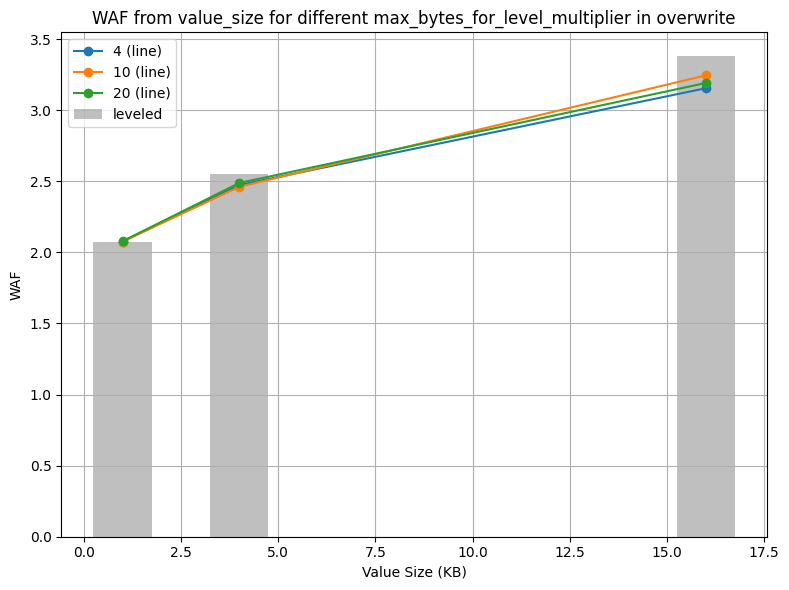

In [37]:
plot_graph(multiplier_overwrite, leveled_overwrite, col="max_bytes_for_level_multiplier", compare="leveled", workload="overwrite")

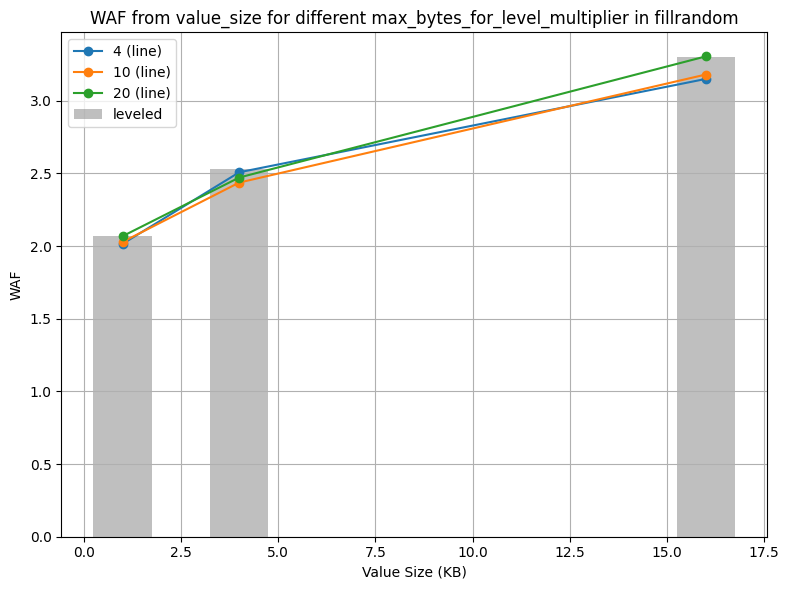

In [38]:
plot_graph(multiplier_fillrandom, leveled_fillrandom, col="max_bytes_for_level_multiplier", compare="leveled", workload="fillrandom")

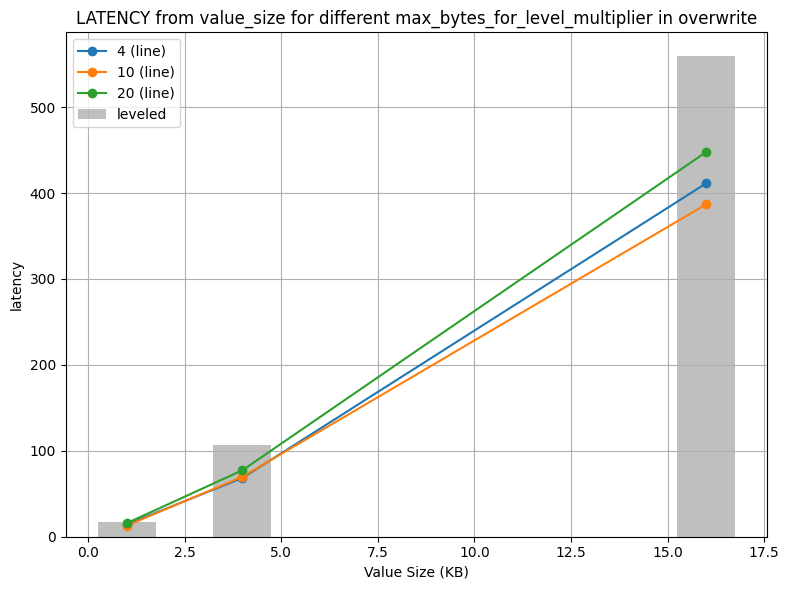

In [39]:
plot_graph(multiplier_overwrite, leveled_overwrite, col="max_bytes_for_level_multiplier", compare="leveled", workload="overwrite", metric="latency")

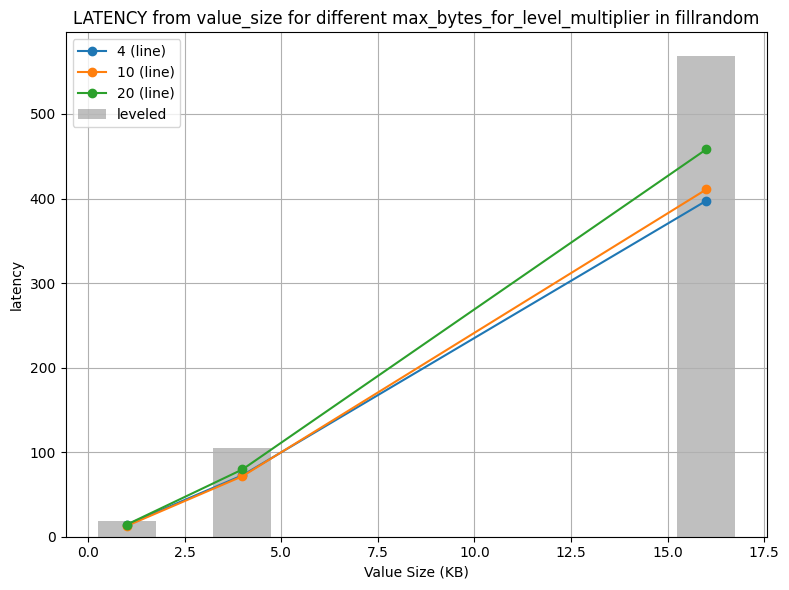

In [40]:
plot_graph(multiplier_fillrandom, leveled_fillrandom, col="max_bytes_for_level_multiplier", compare="leveled", workload="fillrandom", metric="latency")

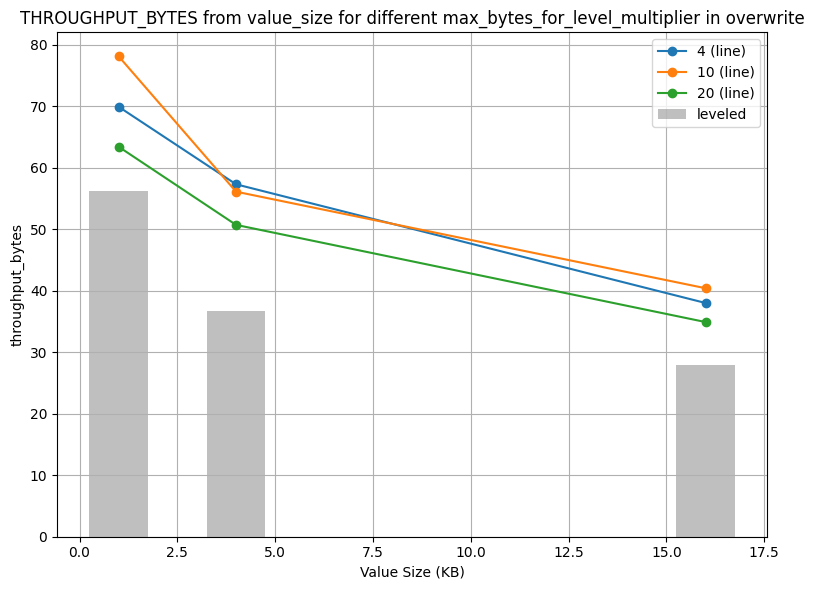

In [41]:
plot_graph(multiplier_overwrite, leveled_overwrite, col="max_bytes_for_level_multiplier", compare="leveled", workload="overwrite", metric="throughput_bytes")

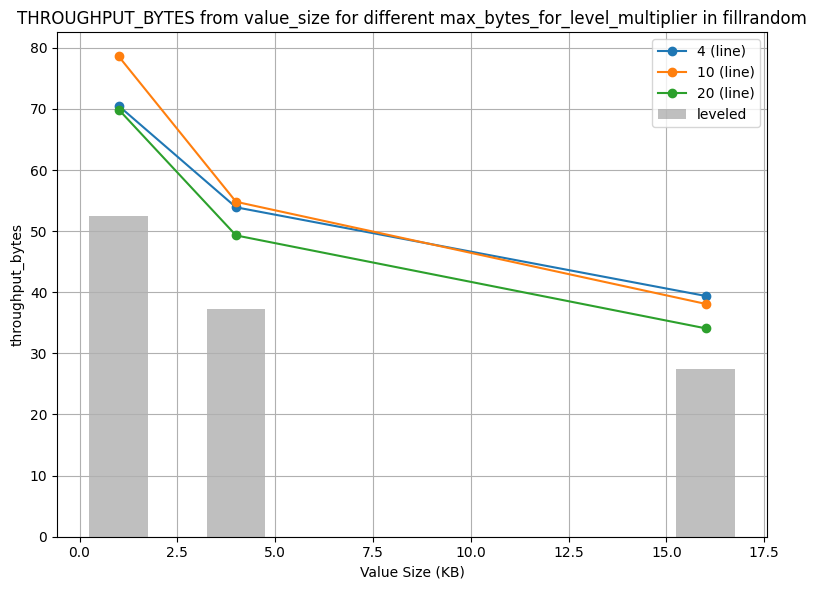

In [42]:
plot_graph(multiplier_fillrandom, leveled_fillrandom, col="max_bytes_for_level_multiplier", compare="leveled", workload="fillrandom", metric="throughput_bytes")

### Universal

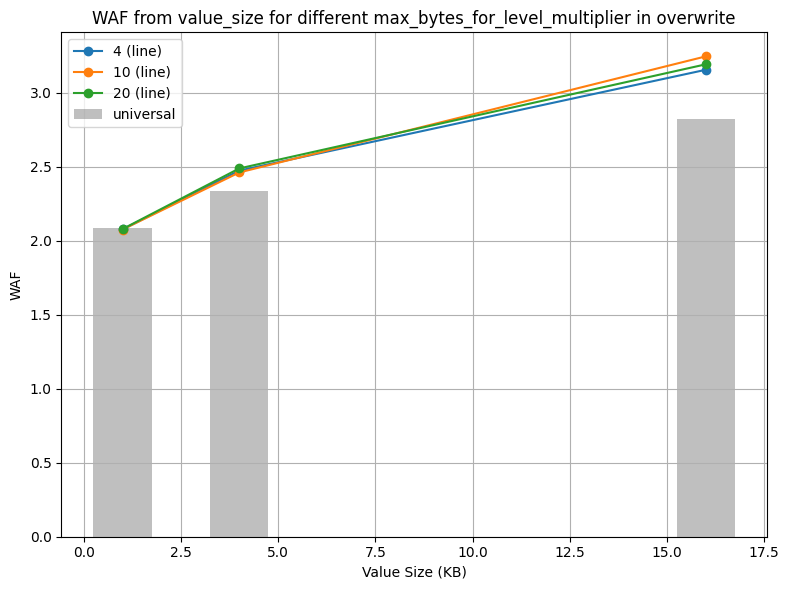

In [43]:
plot_graph(multiplier_overwrite, universal_overwrite, col="max_bytes_for_level_multiplier", workload="overwrite")

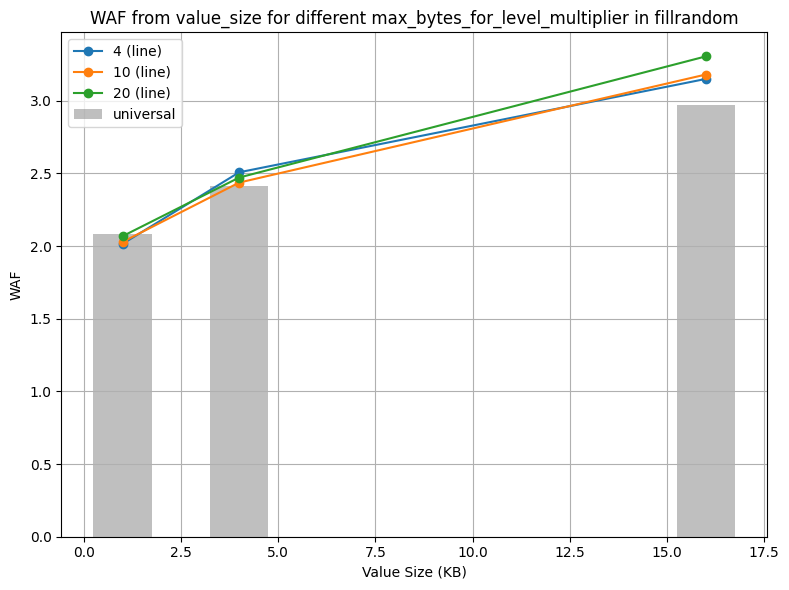

In [44]:
plot_graph(multiplier_fillrandom, universal_fillrandom, col="max_bytes_for_level_multiplier", workload="fillrandom")

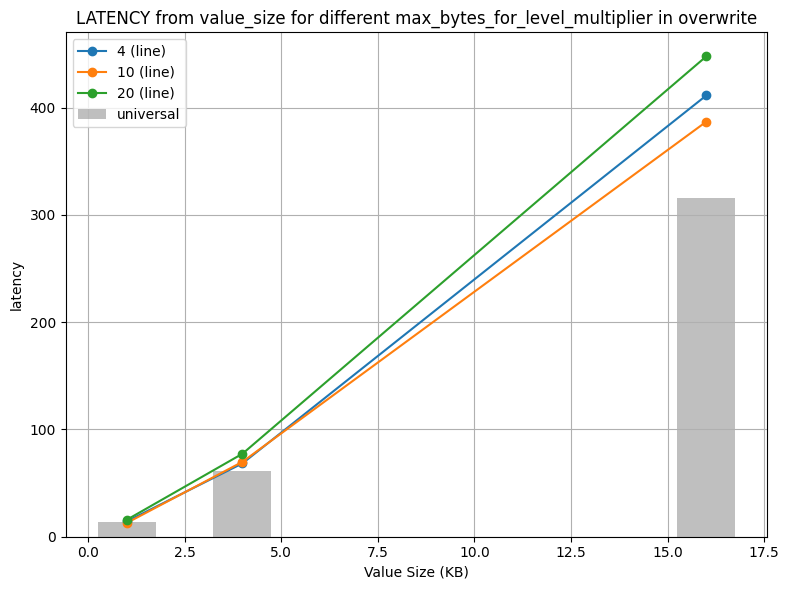

In [45]:
plot_graph(multiplier_overwrite, universal_overwrite, col="max_bytes_for_level_multiplier", workload="overwrite", metric="latency")

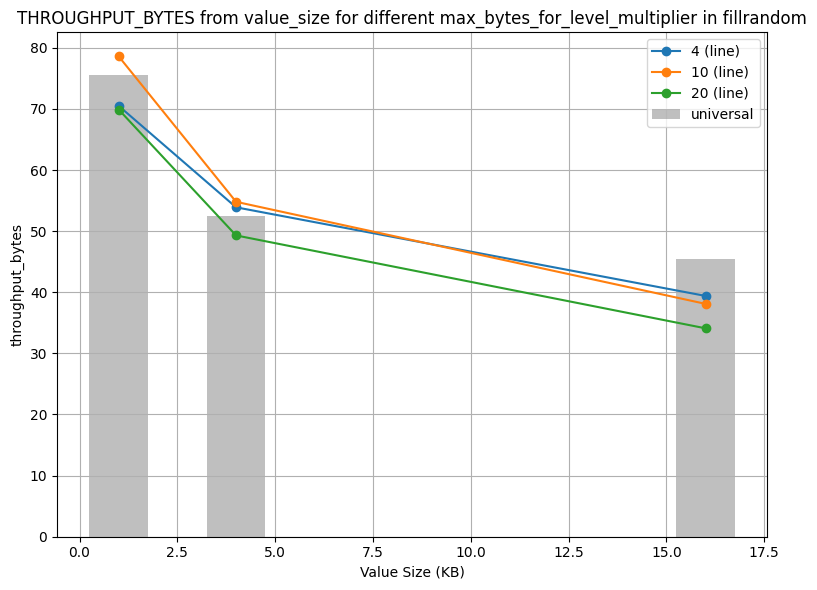

In [46]:
plot_graph(multiplier_fillrandom, universal_fillrandom, col="max_bytes_for_level_multiplier", workload="fillrandom", metric="throughput_bytes")

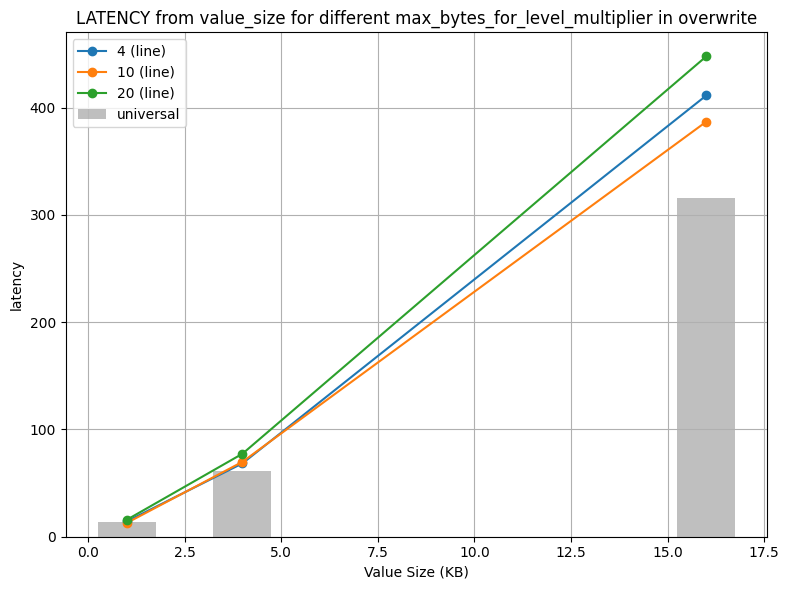

In [47]:
plot_graph(multiplier_overwrite, universal_overwrite, col="max_bytes_for_level_multiplier", workload="overwrite", metric="latency")

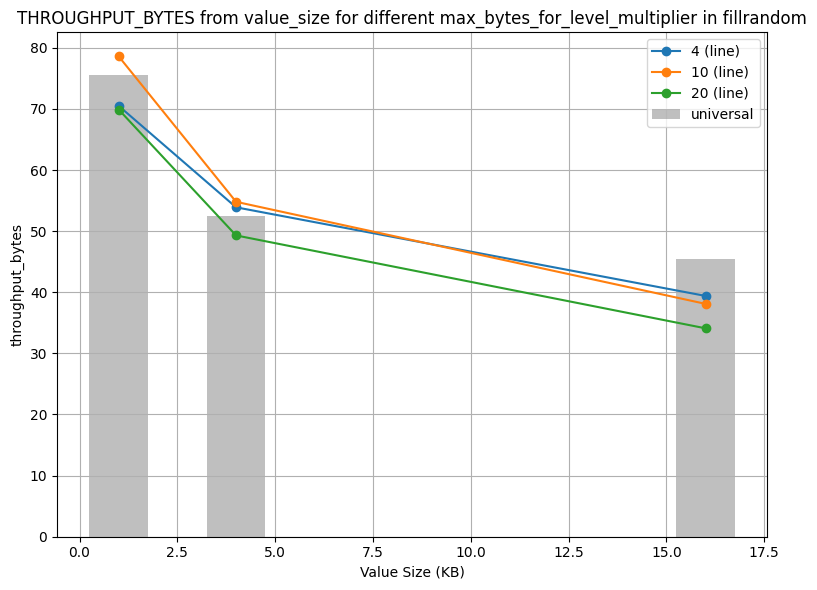

In [48]:
plot_graph(multiplier_fillrandom, universal_fillrandom, col="max_bytes_for_level_multiplier", workload="fillrandom", metric="throughput_bytes")